<a href="https://colab.research.google.com/github/ponsoni74/app_dashboard_and_prediction_model/blob/main/Tech_Challenge_Fase_4__Previs%C3%A3o_Pre%C3%A7o_Petroleo_Brent_modelo_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_excel('preco_petroleo_brent_12-05-2000.xlsx', parse_dates=['Data'], index_col='Data')  #dayfirst=True,

#data = pd.read_csv('Ibovespa_new.csv',  parse_dates=['Data'], dayfirst=True, index_col='Data')
#data.drop(['Data'] < "2000-05-12", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8012 entries, 2024-11-18 to 2000-05-12
Data columns (total 1 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Cotação_Petroleo_Brent (US$)  8012 non-null   float64
dtypes: float64(1)
memory usage: 125.2 KB


In [3]:
# Carga e pre-processamento dos dados da série temporal
#data = pd.read_csv('Ibovespa_new.csv',  parse_dates=['Data'], dayfirst=True, index_col='Data')
#data.drop(columns = ['Abertura',	'Máxima', 'Mínima',	'Var%', 'Vol.'], inplace=True)
#data.info()

# Inversão dos elementos do array para o gráfico evoluir para a direita
#data = data[::-1]

In [4]:
data

,Cotação_Petroleo_Brent (US$)
Data,
2024-11-18,74.35
2024-11-15,73.45
2024-11-14,73.39
2024-11-13,72.86
2024-11-12,72.56
...,...
2000-05-18,28.90
2000-05-17,28.40
2000-05-16,28.78


In [5]:
# Normalização dos dados
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [6]:
scaled_data

array([[0.48379441],
       [0.47711934],
       [0.47667433],
       ...,
       [0.14581325],
       [0.14195654],
       [0.13987985]])

In [7]:
# Preparação dos dados com a geração do array de entrada X (sequencias), e do array de saída equivalente y.
def create_sequences(data, sequence_length):
  X_sequences, y_targets = [], []

  for i in range(len(data) - sequence_length):
    X_sequences.append(scaled_data[i:i+sequence_length, 0])
    y_targets.append(scaled_data[i+sequence_length, 0])

  return np.array(X_sequences), np.array(y_targets)

sequence_length = 10
X, y = create_sequences(scaled_data, sequence_length)


In [8]:
# Separação dos dados entre conjunto de dados para treinamento e conjunto de dados para teste.
train_size = int(len(X) * 0.8)
X_train, X_test = X[train_size:], X[:train_size]
y_train, y_test = y[train_size:], y[:train_size]

In [9]:
# Separação dos dados entre conjunto de dados para treinamento e conjunto de dados para teste.
#train_size = int(len(X) * 0.8)
#X_train, X_test = X[:train_size], X[train_size:]
#y_train, y_test = y[:train_size], y[train_size:]

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1601, 10), (1601,), (6401, 10), (6401,))

In [11]:
X_train

array([[0.30097159, 0.30178744, 0.30586665, ..., 0.30772083, 0.30868501,
        0.31276422],
       [0.30178744, 0.30586665, 0.29933991, ..., 0.30868501, 0.31276422,
        0.32151598],
       [0.30586665, 0.29933991, 0.30979752, ..., 0.31276422, 0.32151598,
        0.32618853],
       ...,
       [0.15219165, 0.15404584, 0.15552918, ..., 0.1475191 , 0.14670326,
        0.14299488],
       [0.15404584, 0.15552918, 0.15204331, ..., 0.14670326, 0.14299488,
        0.14581325],
       [0.15552918, 0.15204331, 0.14722243, ..., 0.14299488, 0.14581325,
        0.14195654]])

In [12]:
X_test[1:2], y_test[:1]

(array([[0.47711934, 0.47667433, 0.47274345, 0.47051843, 0.46777423,
         0.48149522, 0.49402952, 0.49988875, 0.50330045, 0.48779945]]),
 array([0.48779945]))

# LSTM com apenas um Layer

In [13]:
# Construindo o modelo LSTM
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Treinando o modelo
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0062
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.3623e-04
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0275e-04
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0331e-04
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.6490e-05
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2109e-05
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.6737e-05
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 9.5950e-05
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 8.8889e-05
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9189e-05


In [15]:
# Testando o modelo com a realização de previsões a partir dos dados de testes.
predictions = model.predict(X_test)

201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [16]:
predictions[:2], y_test[:2]

(array([[0.48637694],
        [0.4885561 ]], dtype=float32),
 array([0.48779945, 0.47845435]))

In [17]:
# Calculando as métricas para avaliação

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse:.8f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.8f}')
print(f'Mean Absolute Error (MAE): {mae:.8f}')

Mean Squared Error (MSE): 0.00063150
Root Mean Squared Error (RMSE): 0.02512956
Mean Absolute Error (MAE): 0.01856355


In [18]:
# Revertendo as escalas para plotar os valores na escala real do índice
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1,1))

In [19]:
predicted_prices[:2], actual_prices[:2]

(array([[74.698204],
        [74.99201 ]], dtype=float32),
 array([[74.89],
        [73.63]]))

In [20]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(actual_prices, predicted_prices)
print(f'Mean Absolute Error (MAE): {mape:.8f}')

Mean Absolute Error (MAE): 0.03290847


In [21]:
data[:-len(y_test)]

,Cotação_Petroleo_Brent (US$)
Data,
2024-11-18,74.35
2024-11-15,73.45
2024-11-14,73.39
2024-11-13,72.86
2024-11-12,72.56
...,...
2018-09-03,77.81
2018-09-01,76.94
2018-08-31,77.05


In [22]:
data.index[len(y_test)]

Timestamp('2005-05-10 00:00:00')

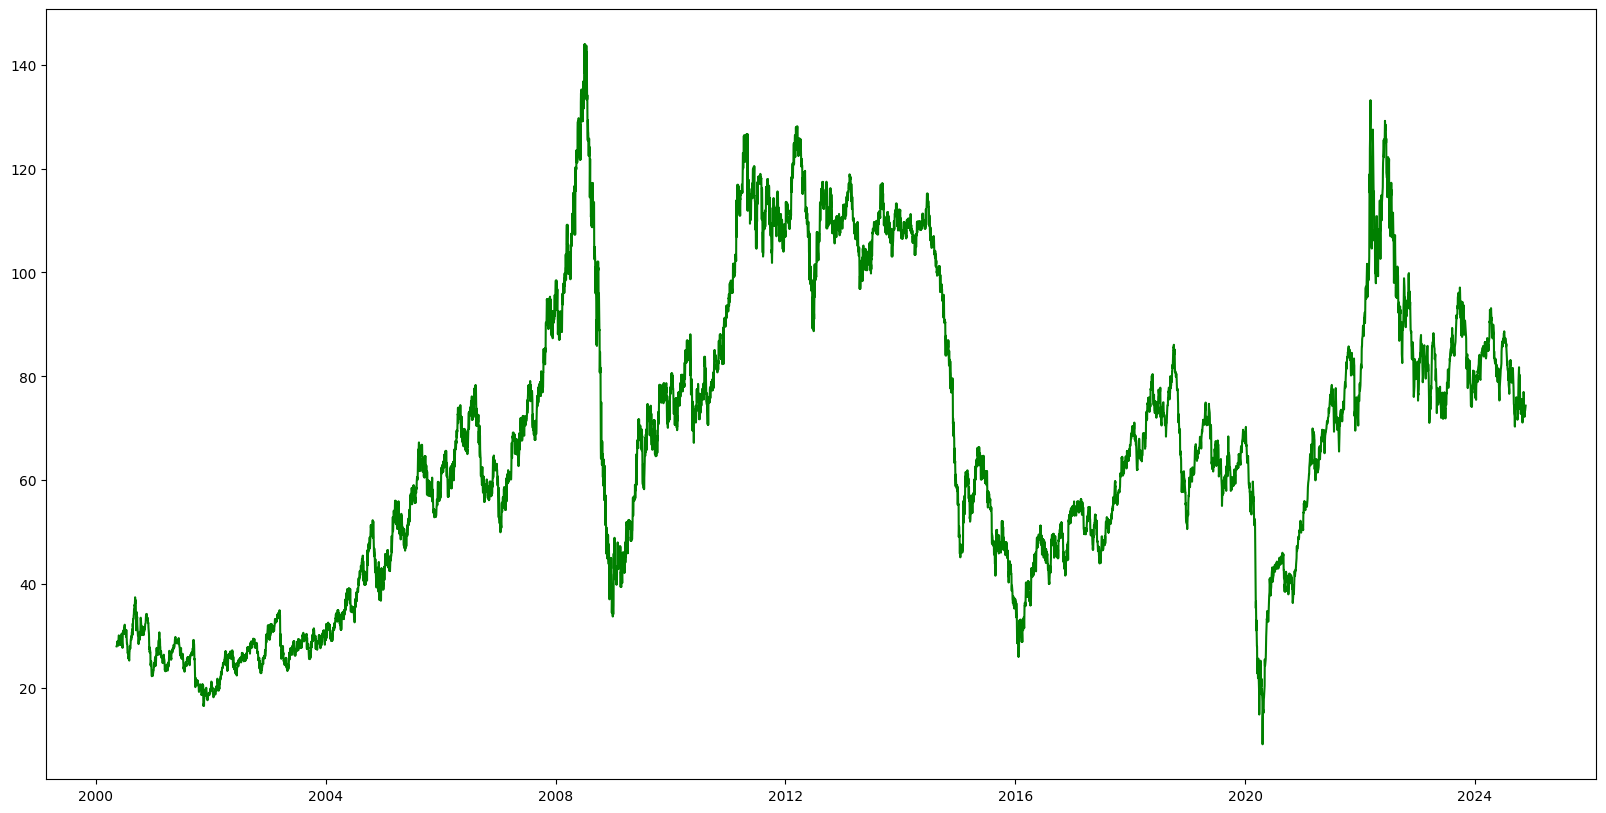

In [23]:
# Plotando os gráficos do período de treinamento e do período onde foram calculadas as previsões
COMPANY = 'Barril Petroleo "Brent"'

plt.figure(figsize=(20,10))

# Poderíamos também usar o array 'X', porém teríamos que também levar em consideração tanto a dimensão correta quanto a transformação de escala
plt.plot(data[:], color='green', label=f"Índices {COMPANY} usados para treino e aprendizagem do modelo")

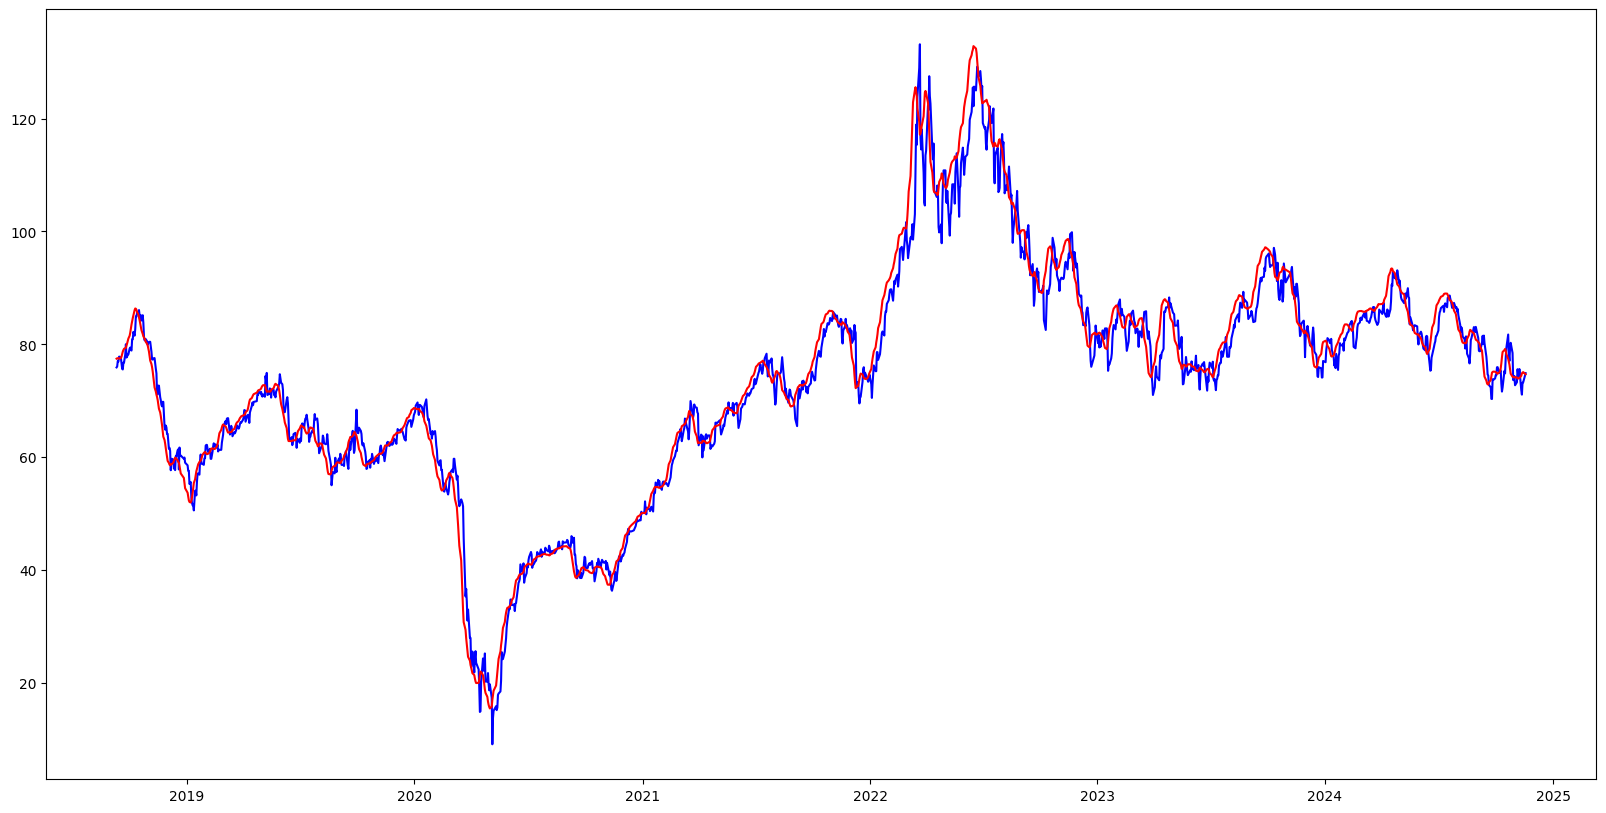

In [24]:
# Plotando os gráficos do período de treinamento e do período onde foram calculadas as previsões
COMPANY = 'Barril Petroleo "Brent"'

plt.figure(figsize=(20,10))

plt.plot(data.index[:len(y_train)], actual_prices[:len(y_train)], color='blue', label=f"Valores reais do Índice {COMPANY} usados na previsão")

plt.plot(data.index[:len(y_train)], predicted_prices[:len(y_train)], color='red', label=f"Valores decorrentes da previsão do Índice {COMPANY}")


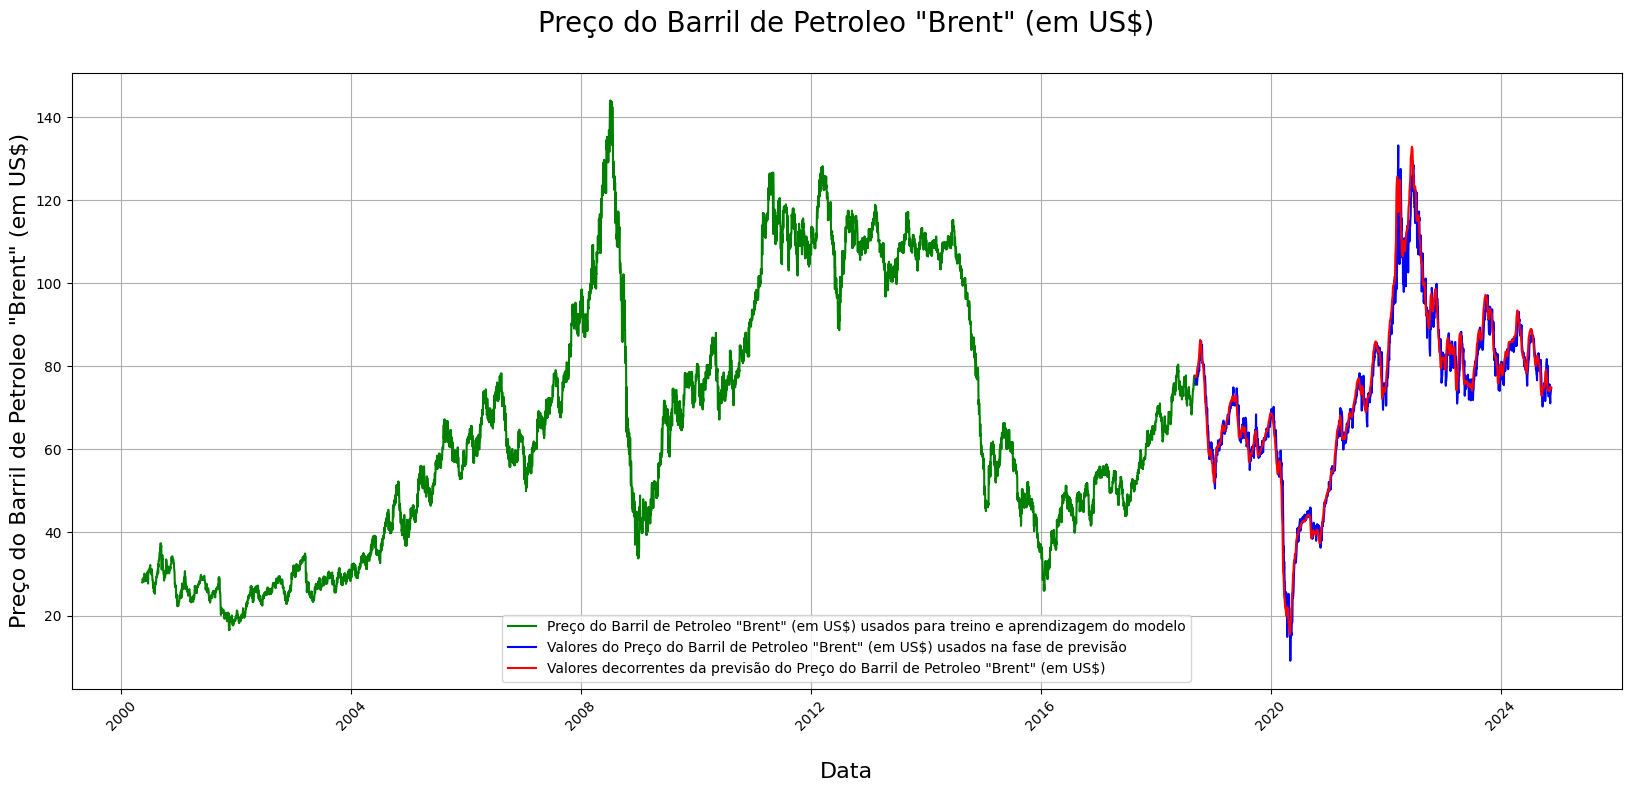

In [25]:
# Plotando os gráficos do período de treinamento e do período onde foram calculadas as previsões
COMPANY = 'Preço do Barril de Petroleo "Brent" (em US$)'

plt.figure(figsize=(20,8))

# Poderíamos também usar o array 'X', porém teríamos que também levar em consideração tanto a dimensão correta quanto a transformação de escala
plt.plot(data.index[len(y_train):], data[len(y_train):], color='green', label=f"{COMPANY} usados para treino e aprendizagem do modelo")

#plt.plot(data.index[:len(y_train)], actual_prices[:len(y_train)], color='blue', label=f"Valores do {COMPANY} usados na previsão")
plt.plot(data.index[:len(y_train)], actual_prices[:len(y_train)], color='blue', label=f"Valores do {COMPANY} usados na fase de previsão")

#plt.plot(data.index[:len(y_train)], predicted_prices, color='red', label=f"Valores decorrentes da previsão do {COMPANY}")
plt.plot(data.index[:len(y_train)], predicted_prices[:len(y_train)], color='red', label=f"Valores decorrentes da previsão do {COMPANY}")


plt.title(f"{COMPANY}\n", fontsize=20)
plt.xlabel("\nData", fontsize=16)
plt.ylabel(f"{COMPANY}", fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.grid()

plt.show()

In [26]:
#pip install joblib

In [27]:
import joblib as jb

In [28]:
jb.dump(model, 'model.pkl')

['model.pkl']

In [29]:
ls

model.pkl  preco_petroleo_brent_12-05-2000.xlsx  sample_data/


In [30]:
# Revertendo as escalas para plotar os valores na escala real do índice
predicted_prices[:], actual_prices[:]

(array([[74.698204],
        [74.99201 ],
        [75.07723 ],
        ...,
        [49.12319 ],
        [49.266384],
        [49.486217]], dtype=float32),
 array([[74.89],
        [73.63],
        [73.25],
        ...,
        [50.61],
        [50.74],
        [51.29]]))

In [31]:
predicted_prices[:-1]

array([[74.698204],
       [74.99201 ],
       [75.07723 ],
       ...,
       [49.035614],
       [49.12319 ],
       [49.266384]], dtype=float32)

In [32]:
predicted_prices[[0]].round(2)

array([[74.7]], dtype=float32)

In [33]:
erro = abs((predicted_prices[[0]].round(2) - actual_prices[[0]].round(2))/ (actual_prices[[0]].round(2))*100).round(2)
erro

array([[0.25]])

In [34]:
model

<Sequential name=sequential, built=True>

In [74]:
valor = pd.DataFrame(actual_prices)

In [94]:
valor.iloc[1][0]

73.63